In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

2023-09-14 12:25:34.824873: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-14 12:25:34.826285: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 12:25:34.858161: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 12:25:34.858841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 12:25:35.522807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.0


In [27]:
#%load_ext tensorboard

In [2]:
x=[]
for i in range(0,250):
    x.append(random.uniform(-1,1))
x=np.array(x)

In [3]:
x=np.array(x)

In [4]:
y=x*x*x

In [5]:
y=np.array(y)

In [6]:
X, X_val, Y, Y_val = train_test_split(x, y, test_size=0.10)


In [7]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [9]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_val=np.array(X_val)
Y_val=np.array(Y_val)
X_test=np.array(X_test)
Y_test=np.array(Y_test)


In [10]:
input_shape = (1,)
batch_size = 50
epochs = 500
seed=5

In [11]:
def build_model_conv1D(input_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
 
    #kernel_regularizer=regularizers.L2(0.1)
    # Classifier
    x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
    x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
    output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(),optimizer=tfk.optimizers.Adam(0.001))

    # Return the model
    return model

In [12]:
model = build_model_conv1D(input_shape)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [40]:
#rm -rf ./logs/

In [14]:
#%tensorboard --logdir logs
history=model.fit(
    x = X_train,
    y = Y_train,
    batch_size=batch_size,
    epochs = epochs,
    verbose=2,
    #callbacks = [tensorboard_callback],
    shuffle = True
    ).history

Epoch 1/500
4/4 - 0s - loss: 0.2001 - 496ms/epoch - 124ms/step
Epoch 2/500
4/4 - 0s - loss: 0.1574 - 5ms/epoch - 1ms/step
Epoch 3/500
4/4 - 0s - loss: 0.1280 - 4ms/epoch - 1ms/step
Epoch 4/500
4/4 - 0s - loss: 0.1083 - 8ms/epoch - 2ms/step
Epoch 5/500
4/4 - 0s - loss: 0.0952 - 7ms/epoch - 2ms/step
Epoch 6/500
4/4 - 0s - loss: 0.0836 - 7ms/epoch - 2ms/step
Epoch 7/500
4/4 - 0s - loss: 0.0746 - 9ms/epoch - 2ms/step
Epoch 8/500
4/4 - 0s - loss: 0.0677 - 5ms/epoch - 1ms/step
Epoch 9/500
4/4 - 0s - loss: 0.0627 - 7ms/epoch - 2ms/step
Epoch 10/500
4/4 - 0s - loss: 0.0592 - 5ms/epoch - 1ms/step
Epoch 11/500
4/4 - 0s - loss: 0.0553 - 5ms/epoch - 1ms/step
Epoch 12/500
4/4 - 0s - loss: 0.0518 - 7ms/epoch - 2ms/step
Epoch 13/500
4/4 - 0s - loss: 0.0485 - 5ms/epoch - 1ms/step
Epoch 14/500
4/4 - 0s - loss: 0.0454 - 6ms/epoch - 2ms/step
Epoch 15/500
4/4 - 0s - loss: 0.0417 - 4ms/epoch - 952us/step
Epoch 16/500
4/4 - 0s - loss: 0.0385 - 9ms/epoch - 2ms/step
Epoch 17/500
4/4 - 0s - loss: 0.0355 - 5ms/

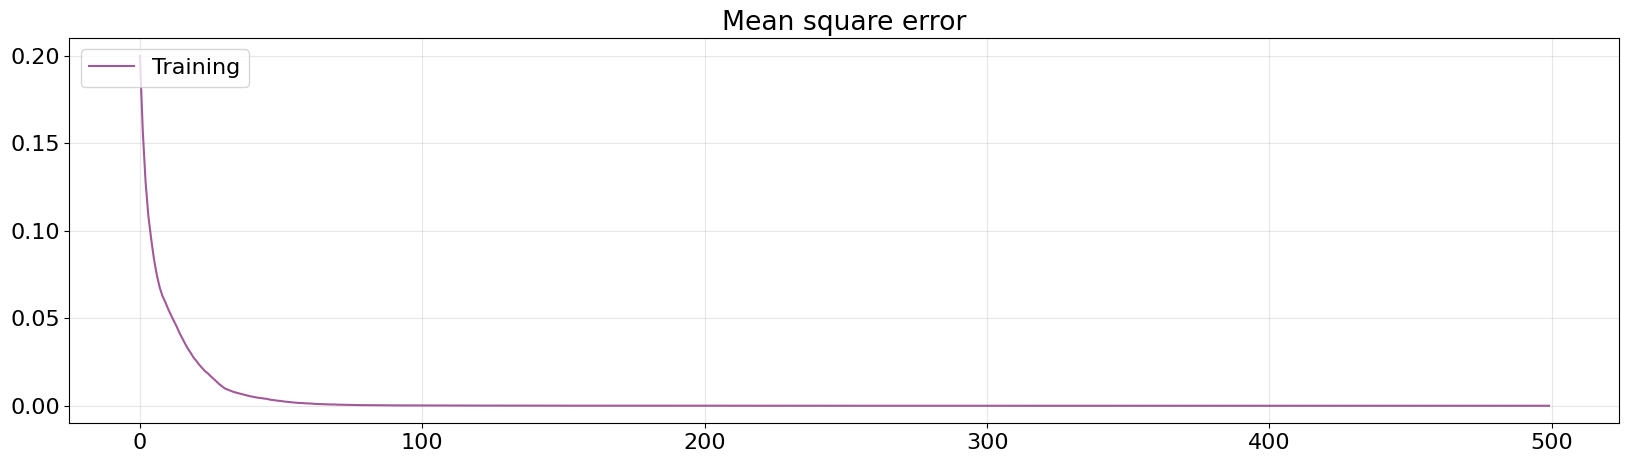

In [16]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)
plt.savefig('loss.png')

In [ ]:
#%tensorboard --logdir logs/fit


In [17]:
points=np.linspace(-1,1,1000)

In [18]:
output=np.array(model.predict(points))

32/32 [==============================] - 0s 811us/step


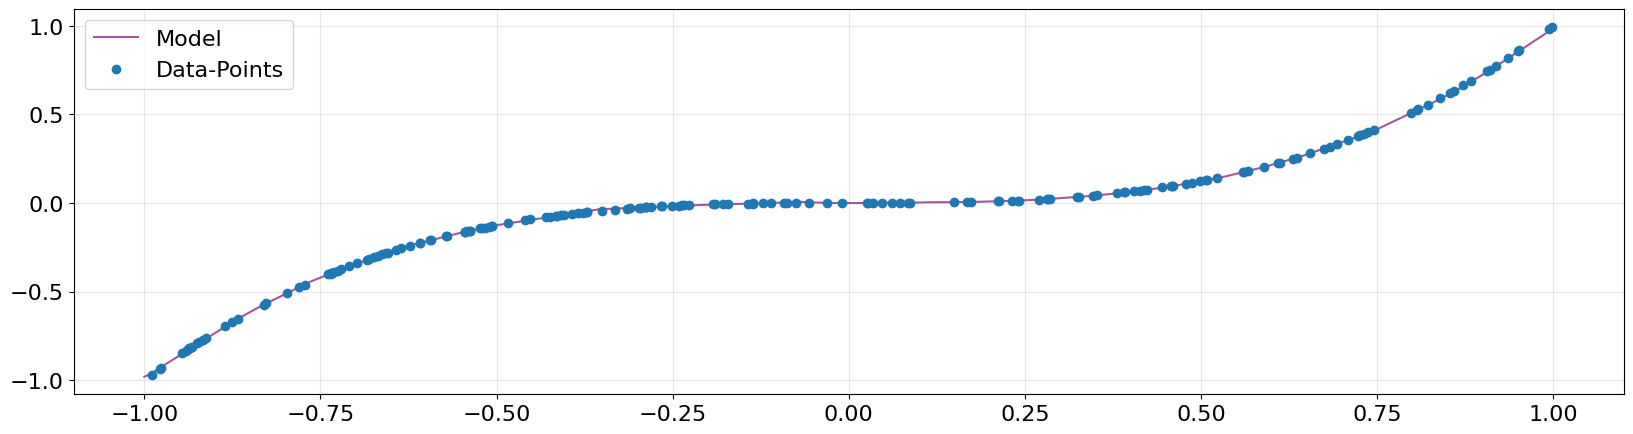

In [19]:
plt.figure(figsize=(20,5))
plt.plot(points,output, label='Model', alpha=.8, color='#8A307F', markersize=20)
plt.plot(X_train,Y_train,"o",label='Data-Points')
plt.legend(loc='upper left')
plt.grid(alpha=.3)
